# Libraries

API docs:
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [289]:
import os

import pandas as pd
import numpy as np

from sklearn import preprocessing, metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC

import matplotlib.pyplot as plt

# Parse VASP Result

TBA

In [293]:
# Put any preprocessing in this block

# Preparing Data

Some data preparation best practices:
- https://towardsdatascience.com/6-amateur-mistakes-ive-made-working-with-train-test-splits-916fabb421bb

In [292]:
print os.listdir('../datasets/input')

['test.csv', 'train.csv', 'ni.csv']


In [279]:
# df = pd.read_csv('../datasets/input/ni.csv')
# X = df.drop(['class'], axis=1)
# y = df['class'].values.astype(object)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

train = shuffle(pd.read_csv('../datasets/input/train.csv'))
test = shuffle(pd.read_csv('../datasets/input/test.csv'))

X_train = train.drop(['class'], axis=1)
y_train = train['class'].values
X_test = test.drop(['class'], axis=1)
y_test = test['class'].values

print X_train.shape, X_test.shape

(128, 39) (64, 39)


In [280]:
X_train.head(n=10)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z10,m1,m2,m3,m4,m5,mtot,fermi,band,toten
56,1.371850,1.956442,0.838505,0.855238,1.927284,1.203376,1.080907,1.940793,1.471447,1.922335,...,0.462054,0.447247,0.453794,0.069828,0.126752,0.212193,1.309814,0.466977,-115.267038,-27.937542
82,1.598116,0.211631,0.346318,1.839197,1.138368,1.383090,1.649057,0.417886,0.689226,1.049812,...,1.716419,0.954973,0.965961,0.208927,0.492311,0.784864,3.407036,0.447093,-91.762150,-18.172861
101,0.979837,1.631199,1.636299,0.682763,1.529578,0.643341,1.791001,0.079554,0.094649,1.787342,...,1.768057,0.549867,0.437954,0.356820,0.544860,0.655191,2.544693,0.695636,-120.604812,-1.807440
4,1.438282,1.561723,0.524540,0.784471,1.471769,1.334637,1.943356,1.983835,1.011546,0.869539,...,0.429976,0.282354,0.775516,0.499140,0.865310,0.509904,2.932224,0.093601,-139.861145,-1.287547
26,0.391476,0.127394,0.239465,1.976987,1.961308,1.224274,0.527980,0.565476,1.099089,1.750463,...,1.985790,0.414693,0.217899,0.854972,0.782541,0.086332,2.356437,0.004324,-62.278363,-39.192820
96,0.683124,1.819606,1.392288,1.060372,0.826310,1.049760,0.035376,1.118492,1.879534,0.275766,...,0.846088,0.795810,0.814038,0.927734,0.156098,0.820807,3.514487,0.488093,-87.177852,-48.307173
102,0.748444,1.951926,0.974896,1.422973,1.676323,1.177223,1.213032,0.660028,0.551097,1.726432,...,0.969417,0.694087,0.271058,0.474265,0.403051,0.829312,2.671773,0.154932,-129.178521,-0.273681
51,1.241279,1.458861,1.602305,1.272903,0.436380,0.827199,0.186876,0.207720,0.784321,0.821709,...,1.788867,0.203190,0.073174,0.841337,0.886530,0.256446,2.260677,-0.349211,-119.332102,-36.418155
68,0.892024,0.971329,0.300293,1.286609,1.902622,0.526788,0.558745,1.841416,1.102335,0.607943,...,0.749500,0.101275,0.039624,0.998457,0.662826,0.038491,1.840672,0.840414,-70.286568,-40.474080
39,0.812359,0.257768,0.765333,1.256148,0.687768,1.447133,0.363195,1.289038,0.976674,1.031237,...,1.051050,0.794988,0.402415,0.052447,0.527398,0.808770,2.586017,-0.401226,-55.644579,-20.598729


# Parameter Tunning and Training

Useful notebook references:
- https://www.kaggle.com/waltermaffy/fruit-classification-pca-svm-knn-decision-tree
- https://www.kaggle.com/tariqmhmd5/pima-india-diabetes-prediction-with-6-algorithms/data
- https://www.kaggle.com/lbronchal/sentiment-analysis-with-svm
- https://www.kaggle.com/pierra/credit-card-dataset-svm-classification

In [285]:
grid_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
clf = GridSearchCV(SVC(), grid_params, cv=cv)
clf.fit(X_train, y_train)

print clf.best_params_

{'kernel': 'linear', 'C': 1}


In [286]:
print metrics.accuracy_score(y_pred, y_test)

0.515625


# Model Evaluaiton

Useful references:
- https://heartbeat.fritz.ai/introduction-to-machine-learning-model-evaluation-fa859e1b2d7f
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
- https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

In [287]:
print confusion_matrix(y_test, y_pred)
print classification_report(y_test, y_pred)

[[16 16]
 [15 17]]
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        32
           1       0.52      0.53      0.52        32

   micro avg       0.52      0.52      0.52        64
   macro avg       0.52      0.52      0.52        64
weighted avg       0.52      0.52      0.52        64



0.515625


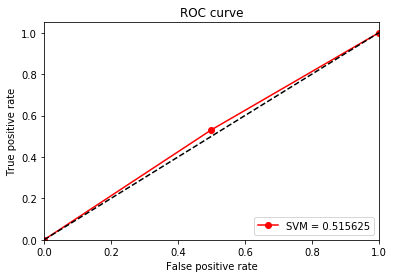

In [288]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print roc_auc

plt.figure()
plt.plot(fpr, tpr, 'ro-', label='SVM = %f' %roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()